<table border="0">
 <tr>
    <td style="width:30%"><img src="img/potentials_logo.png" width="100%" align="justify"></td>
    <td style="width:70%"> <p style="width:100%;color:#B71C1C;font-size:24px;text-align:justify"> From electrons to phase diagrams </p> <p style="width:100%,font-size:16px">Day 03 Hands-on session exercise (Part 2)</td>
 </tr>
</table>

In [1]:
from helpers import potential_list
from pyiron_atomistics import Project
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pr = Project('exe2') 

### Task 1: Calculate free energy of FCC Al at 500 K, 10000 bar

Use a lattice constant of 4.099 for the BCC structure

### Task 2: Does Al have a solid-solid phase tranformation?

Calculate the free energy of Al in BCC and FCC structures in the temperature range of 500-1000 K. See if there is a solid-solid phase transformation. Use lattice constant of 3.264 for BCC, and 4.099 for FCC.

In [7]:
structure_fcc = pr.create.structure.ase.bulk('Al', cubic=True, a=4.099).repeat(5)

In [8]:
al_fcc = pr.create.job.Calphy("al_fcc_600", delete_aborted_job=True)
al_fcc.potential = potential_list[0]
al_fcc.structure = structure_fcc
al_fcc.server.cores = 4
al_fcc.calc_free_energy(temperature=[500, 1000], 
                     pressure=0, 
                     reference_phase="solid",
                     n_equilibration_steps=10000,
                     n_switching_steps=10000)
al_fcc.run()

/home/menon/miniconda3/envs/workshop/lib/python3.9/site-packages/h5io/_h5io.py:56: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Name', 'Filename', 'Model', 'Species', 'Config'], dtype='object')]

  data.to_hdf(fname, rootpath)


The job al_fcc_600 was saved and received the ID: 162


/home/menon/miniconda3/envs/workshop/lib/python3.9/site-packages/h5io/_h5io.py:56: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Name', 'Filename', 'Model', 'Species', 'Config'], dtype='object')]

  data.to_hdf(fname, rootpath)


In [5]:
structure_bcc = pr.create.structure.ase.bulk('Al', 
                                             crystalstructure='bcc',
                                             cubic=True, a=3).repeat(5)

In [6]:
al_bcc = pr.create.job.Calphy("al_bcc_600", delete_aborted_job=True)
al_bcc.potential = potential_list[0]
al_bcc.structure = structure_bcc
al_bcc.server.cores = 4
al_bcc.calc_free_energy(temperature=[500, 1000], 
                     pressure=0, 
                     reference_phase="solid",
                     n_equilibration_steps=10000,
                     n_switching_steps=10000)
al_bcc.run()

/home/menon/miniconda3/envs/workshop/lib/python3.9/site-packages/h5io/_h5io.py:56: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Name', 'Filename', 'Model', 'Species', 'Config'], dtype='object')]

  data.to_hdf(fname, rootpath)


The job al_bcc_600 was saved and received the ID: 161


/home/menon/miniconda3/envs/workshop/lib/python3.9/site-packages/h5io/_h5io.py:56: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->Index(['Name', 'Filename', 'Model', 'Species', 'Config'], dtype='object')]

  data.to_hdf(fname, rootpath)


Plot the solution

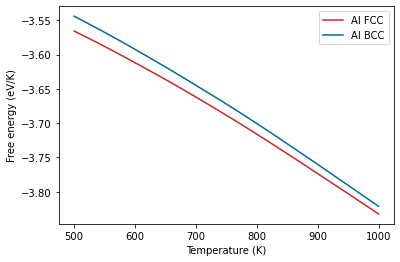

In [11]:
plt.plot(al_fcc.output.temperature, al_fcc.output.energy_free,
        label="Al FCC", color='#C62828')
plt.plot(al_bcc.output.temperature, al_bcc.output.energy_free,
        label="Al BCC", color='#006899')
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/K)")
plt.legend()

As expected the free energy of the FCC lattice is lower than BCC:

### Task 3: Calculate melting temperature of Al at 10000 bar

### Task 4: Calculate the melting temperature of Li

The potential for Li can be accessed as `potential_list[1]`. Use temperature range of 350-500.  